<a href="https://colab.research.google.com/github/AnthonyJFeola/DS-Unit-4-Sprint-1-NLP/blob/main/module3-document-classification/LS_DS_422_BOW_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Vector Representations
## *Data Science Unit 4 Sprint 2 Assignment 2*

In [1]:
import re
import string

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import spacy
from spacy.tokenizer import Tokenizer
import requests

!pip install squarify
import squarify
import matplotlib.pyplot as plt

from sklearn.neighbors import NearestNeighbors

from bs4 import BeautifulSoup

## 1) *Clean:* Job Listings from indeed.com that contain the title "Data Scientist" 

You have `job_listings.csv` in the data folder for this module. The text data in the description column is still messy - full of html tags. Use the [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) library to clean up this column. You will need to read through the documentation to accomplish this task. 

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/main/module2-vector-representations/data/job_listings.csv')

In [3]:
df.head()

,Unnamed: 0,description,title
0,0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist
1,1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I
2,2,b'<div><p>As a Data Scientist you will be work...,Data Scientist - Entry Level
3,3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist
4,4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist


In [4]:
df = df.drop(['Unnamed: 0'], axis=1)

In [5]:
df.head()

,description,title
0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist
1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I
2,b'<div><p>As a Data Scientist you will be work...,Data Scientist - Entry Level
3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist
4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist


In [6]:
df['description'][0]

'b"<div><div>Job Requirements:</div><ul><li><p>\\nConceptual understanding in Machine Learning models like Nai\\xc2\\xa8ve Bayes, K-Means, SVM, Apriori, Linear/ Logistic Regression, Neural, Random Forests, Decision Trees, K-NN along with hands-on experience in at least 2 of them</p>\\n</li><li><p>Intermediate to expert level coding skills in Python/R. (Ability to write functions, clean and efficient data manipulation are mandatory for this role)</p>\\n</li><li><p>Exposure to packages like NumPy, SciPy, Pandas, Matplotlib etc in Python or GGPlot2, dplyr, tidyR in R</p>\\n</li><li><p>Ability to communicate Model findings to both Technical and Non-Technical stake holders</p>\\n</li><li><p>Hands on experience in SQL/Hive or similar programming language</p>\\n</li><li><p>Must show past work via GitHub, Kaggle or any other published article</p>\\n</li><li><p>Master\'s degree in Statistics/Mathematics/Computer Science or any other quant specific field.</p></li></ul><div><div><div><div><div><d

In [7]:
clean_descs = []

for desc in df['description']:
  soup = BeautifulSoup(desc, 'html.parser')
  text = soup.get_text()[1:].lower()
  #cleaned_text = re.sub('[^a-zA-Z 0-9]', '', text)
  clean_descs.append(text)

df['description'] = clean_descs

In [8]:
df.head()

,description,title
0,"""job requirements:\nconceptual understanding i...",Data scientist
1,"'job description\n\nas a data scientist 1, you...",Data Scientist I
2,'as a data scientist you will be working on co...,Data Scientist - Entry Level
3,"'$4,969 - $6,756 a monthcontractunder the gene...",Data Scientist
4,'location: usa \xe2\x80\x93 multiple locations...,Data Scientist


## 2) Use Spacy to tokenize the listings 

In [9]:
!python -m spacy download en_core_web_lg

nlp = spacy.load("en_core_web_lg")

# Tokenizer
tokenizer = Tokenizer(nlp.vocab)

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


In [10]:
tokens = []

for doc in tokenizer.pipe(df['description'], batch_size=500):
  doc_tokens = [token.text for token in doc]
  tokens.append(doc_tokens)

df['description'] = tokens

In [11]:
df.head()

,description,title
0,"[""job, requirements:\nconceptual, understandin...",Data scientist
1,"['job, description\n\nas, a, data, scientist, ...",Data Scientist I
2,"['as, a, data, scientist, you, will, be, worki...",Data Scientist - Entry Level
3,"['$4,969, -, $6,756, a, monthcontractunder, th...",Data Scientist
4,"['location:, usa, \xe2\x80\x93, multiple, loca...",Data Scientist


## 3) Use Scikit-Learn's CountVectorizer to get word counts for each listing.

In [12]:
vect = CountVectorizer()

# build vocab
vect.fit(clean_descs)

# transform text
dtm = vect.transform(clean_descs)

In [13]:
dtm = pd.DataFrame(dtm.todense(), columns=vect.get_feature_names())

In [14]:
dtm.head()

,00,000,02115,03,0356,04,062,06366,08,10,100,1000,1001,1008,100k,100x,105,1079302,1082692,10b,10ms,10x,11,110k,112,114157802,12,120,125,126,130,1315,1324b,138,14,140,15,150,15000,159m,...,xef,xgboost,xp,xpo,yards,year,yeara,yearas,yearcollects,yeardescription,yearjob,yearlrs,years,yearsexperience,yearsummary,yearthe,yeartitle,yearworking,yes,yet,yeti,yield,york,you,young,your,yours,yourself,youtube,yrs,zenreach,zero,zeus,zf,zheng,zillow,zones,zoom,zuckerberg,zurich
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## 4) Visualize the most common word counts

In [15]:
sums = []
cols = dtm.columns.tolist()
for col in cols:
  sum_count = sum(dtm[col])
  sums.append(sum_count)

In [16]:
sums.sort(reverse=True)

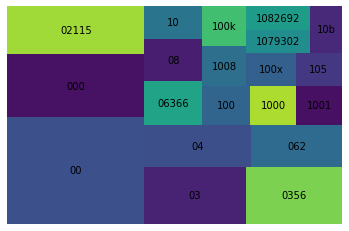

In [17]:
squarify.plot(sizes=sums[:20], label=cols)
plt.axis('off')
plt.show()

## 5) Use Scikit-Learn's tfidfVectorizer to get a TF-IDF feature matrix

In [18]:
def tokenize(document):
    
    doc = nlp(document)
    
    return [token.lemma_.strip() for token in doc if (token.is_stop != True) and (token.is_punct != True)]

In [19]:
# Instantiate vectorizer object
tfidf = TfidfVectorizer(stop_words='english', 
                        ngram_range=(1,2),
                        max_df=.97,
                        min_df=3,
                        tokenizer=tokenize)

# Create a vocabulary and get word counts per document
dtm = tfidf.fit_transform(clean_descs) # Similiar to fit_predict

# Get feature names to use as dataframe column headers
dtm = pd.DataFrame(dtm.todense(), columns=tfidf.get_feature_names())

# View Feature Matrix as DataFrame
dtm.tail()

,$,"$ 100,000",$ 300,$ 40,+,+ city,+ year,+ years\xe2\x80\x99,.\n\nabout,.\n\nabout role\n\nas,.\n\nperks\n\nhealth,.\n\nperks\n\nhealth insurance,/or,0,0 2,1,1 +,1 year,10,10 time,10 year,100,100 company,100 country,100 premium,"100,000",11,12,12 month,15,17,2,2 +,2 4,2 5,2 year,2 years\nrequirements\n\xc2\xbb,2 years\xe2\x80\x99,20,20 pound,...,year professional,year real,year related,year relevant,year simple,year technical,year work,years\,years\ experience,years\nrequirements\n\xc2\xbb,years\nrequirements\n\xc2\xbb experience,years\xe2\x80\x99,years\xe2\x80\x99 experience,years\xe2\x80\x99 professional,yearthe,yes,york,york city,york offices.\n\ndepending,you.\n\nabout,you.\n\nabout opportunity,you\'ll,you\'ll work,you\'re,you\n\nyou,you\xe2\x80\x99ll,you\xe2\x80\x99ll access,you\xe2\x80\x99ll develop,you\xe2\x80\x99ll need\n\nphd,you\xe2\x80\x99ll opportunity,you\xe2\x80\x99ll partner,you\xe2\x80\x99ll work,you\xe2\x80\x99re,you\xe2\x80\x99re look,you\xe2\x80\x99re ready,you\xe2\x80\x99ve,you\xe2\x80\x99ve work,yrs,|,||
421,0.035812,0.0,0.0,0.0,0.04457,0.0,0.048667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.042016,0.062034,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.044655,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.033736,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
422,0.000000,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.116722,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
423,0.089849,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
424,0.000000,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
425,0.000000,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 6) Create a NearestNeighbor Model. Write the description of your ideal datascience job and query your job listings. 

In [20]:
# Fit on DTM
nn = NearestNeighbors(n_neighbors=5, algorithm='kd_tree')
nn.fit(dtm)

NearestNeighbors(algorithm='kd_tree', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [21]:
my_dream_description = ['''
Responsibilities
Selecting features, building and optimizing classifiers using machine learning techniques
Data mining using state-of-the-art methods
Extending company’s data with third party sources of information when needed
Enhancing data collection procedures to include information that is relevant for building analytic systems
Processing, cleansing, and verifying the integrity of data used for analysis
Doing ad-hoc analysis and presenting results in a clear manner
Creating automated anomaly detection systems and constant tracking of its performance
Skills and Qualifications
Excellent understanding of machine learning techniques and algorithms, such as k-NN, Naive Bayes, SVM, Decision Forests, etc.
Experience with common data science toolkits, such as R, Weka, NumPy, MatLab
''']

In [22]:
# Query for Sim of Random doc to BBC
my_dream_description_sim = tfidf.transform(my_dream_description)

In [23]:
nn.kneighbors(my_dream_description_sim.todense())

(array([[1.04428039, 1.04428039, 1.05472069, 1.21163285, 1.24196877]]),
 array([[187, 104,  91, 151, 330]]))

In [24]:
clean_descs[187]

"'internshipit\\'s fun to work in a company where people truly believe in what they\\'re doing!\\n\\nwe\\'re committed to bringing passion and customer focus to the business.\\nif you like wild growth and working with happy, enthusiastic over-achievers, you\\'ll enjoy your career with us!\\nwe are looking for a data scientist that will help us discover the information hidden in vast amounts of data, and help us make smarter decisions to deliver even better products. your primary focus will be in applying data mining techniques, doing statistical analysis, and building high quality prediction systems integrated with our products. projects include but not limited to; automating current reports and creating data visualizations for key performance indicators.\\nresponsibilities\\ndata mining using state-of-the-art methods\\nextending company\\xe2\\x80\\x99s data with third party sources of information when needed\\nenhancing data collection procedures to include information that is relevan

## Stretch Goals

 - Try different visualizations for words and frequencies - what story do you want to tell with the data?
 - Scrape Job Listings for the job title "Data Analyst". How do these differ from Data Scientist Job Listings
 - Try and identify requirements for experience specific technologies that are asked for in the job listings. How are those distributed among the job listings?
 - Use a clustering algorithm to cluster documents by their most important terms. Do the clusters reveal any common themes?
  - **Hint:** K-means might not be the best algorithm for this. Do a little bit of research to see what might be good for this. Also, remember that algorithms that depend on Euclidean distance break down with high dimensional data.
 - Create a labeled dataset - which jobs will you apply for? Train a model to select the jobs you are most likely to apply for. :) 